<a href="https://colab.research.google.com/github/alexisapp94/Curso-de-machineLearning/blob/main/Anemia_Proyect_Alexis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://img.freepik.com/premium-vector/anemic-drop-blood-lack-red-cells-anemia-isolated-white-background-vector-illustration_449806-529.jpg
" width="300" height="300" >


<h1 align=center><font size = 5>Anemia</font></h1>

---

## Introducción

El presente proyecto tiene como objetivo realizar un algoritmo de ML para predecir si es probable que un paciente sufra anemia

## Descargar y limpiar Dataset

Primero, importemos algunos módulos comunes.

In [ ]:
# Scikit-Learn
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<b>Valores del dataset anemia</b>

<h5>La variable <b>Result</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de Boston tiene 1421 filas y 6 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Gender : </b> Genero 0 - masculino, 1 - femenino.

* <b>Hemoglobin : </b> La hemoglobina es una proteína en sus glóbulos rojos que transporta oxígeno a los órganos y tejidos de su cuerpo y transporta dióxido de carbono desde sus órganos y tejidos de regreso a sus pulmones.

* <b>MCH : </b> MCH es la abreviatura de "hemoglobina corpuscular media". Es la cantidad promedio en cada uno de sus glóbulos rojos de una proteína llamada hemoglobina, que transporta oxígeno por todo el cuerpo.

* <b>MCHC : </b> MCHC significa concentración de hemoglobina corpuscular media. Es una medida de la concentración promedio de hemoglobina dentro de un solo glóbulo rojo.

* <b>MCV : </b>MCV significa volumen corpuscular medio. Un análisis de sangre MCV mide el tamaño promedio de sus glóbulos rojos.

* <b>Results : </b>0 no anémico, 1 anémico.


---

<strong>Puede consultar este [link](https://www.kaggle.com/datasets/biswaranjanrao/anemia-dataset) para leer más sobre la fuente de datos anemia.</strong>

<strong>Puede descargar la data en este [link](https://www.kaggle.com/datasets/biswaranjanrao/anemia-dataset/download?datasetVersionNumber=1)</strong>

## 1. Leyendo y Explorando data

In [ ]:
#cargamos la data
df_anemia = pd.read_csv('anemia.csv', sep=",")

In [ ]:
df_anemia.head()

In [ ]:
df_anemia.shape

(1421, 6)

In [ ]:
# Vamos a describir la información
df_anemia.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,1421.0,0.520760,0.499745,0.0,0.0,1.0,1.0,1.0
Hemoglobin,1421.0,13.412738,1.974546,6.6,11.7,13.2,15.0,16.9
MCH,1421.0,22.905630,3.969375,16.0,19.4,22.7,26.2,30.0
MCHC,1421.0,30.251232,1.400898,27.8,29.0,30.4,31.4,32.5
MCV,1421.0,85.523786,9.636701,69.4,77.3,85.3,94.2,101.6
Result,1421.0,0.436312,0.496102,0.0,0.0,0.0,1.0,1.0


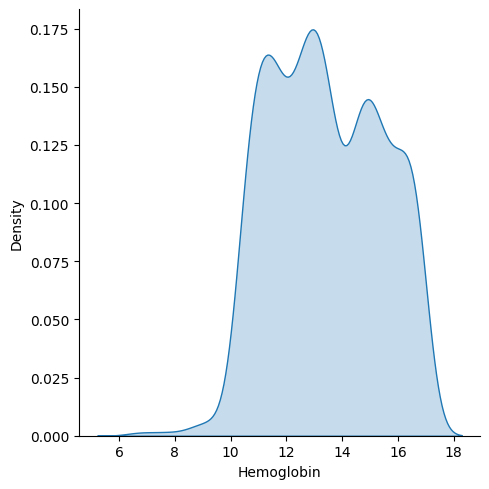

In [ ]:
# Gráfico de distribución
import seaborn as sns
sns.displot(df_anemia.Hemoglobin, kind="kde", fill=True)

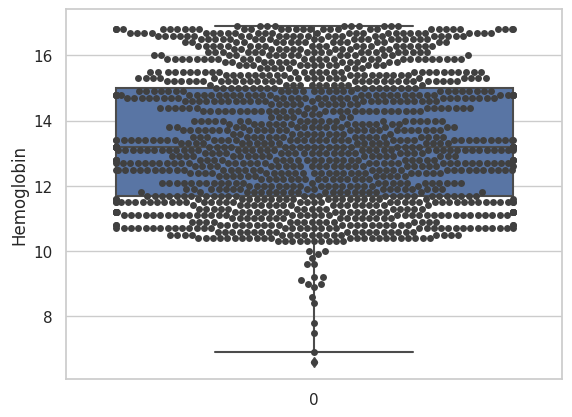

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df_anemia.Hemoglobin, orient="v")
ax = sns.swarmplot(data=df_anemia.Hemoglobin, color=".25")

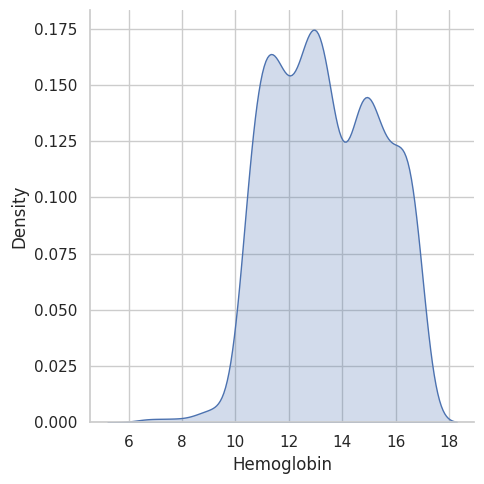

In [ ]:
sns.displot(df_anemia.Hemoglobin, kind="kde", fill=True)

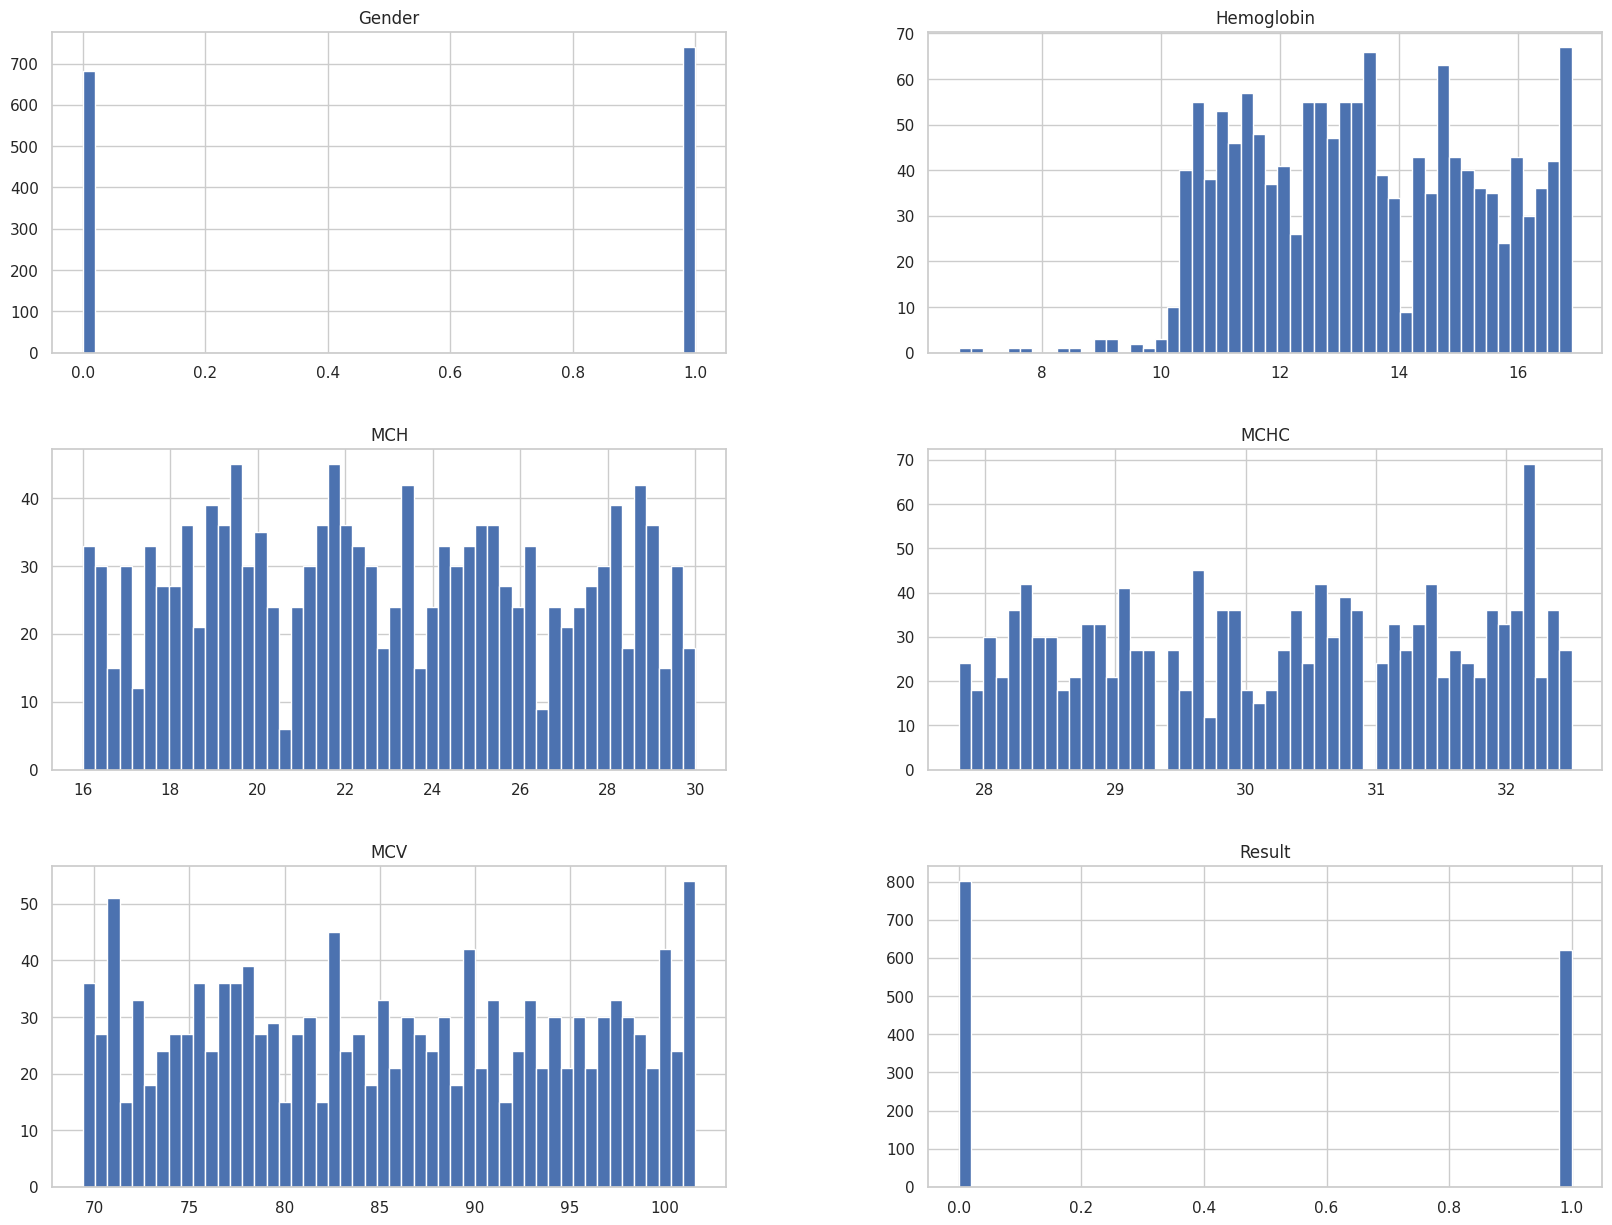

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df_anemia.hist(bins=50, figsize=(20,15))
plt.show()

## 2. Selección de muestras

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
df_anemia = shuffle(df_anemia, random_state = 123)

In [ ]:
# Elección de variables
features = list(set(df_anemia.columns.tolist()) - set(['Result']))
features

['MCHC', 'Gender', 'Hemoglobin', 'MCH', 'MCV']

In [ ]:
# Definiendo data
X = df_anemia[features]
y = df_anemia.Result

In [ ]:
# Muestreo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    random_state = 123)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(1421, 5)
(994, 5)
(427, 5)


array([[<Axes: xlabel='MCHC', ylabel='MCHC'>,
        <Axes: xlabel='Gender', ylabel='MCHC'>,
        <Axes: xlabel='Hemoglobin', ylabel='MCHC'>,
        <Axes: xlabel='MCH', ylabel='MCHC'>,
        <Axes: xlabel='MCV', ylabel='MCHC'>],
       [<Axes: xlabel='MCHC', ylabel='Gender'>,
        <Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Hemoglobin', ylabel='Gender'>,
        <Axes: xlabel='MCH', ylabel='Gender'>,
        <Axes: xlabel='MCV', ylabel='Gender'>],
       [<Axes: xlabel='MCHC', ylabel='Hemoglobin'>,
        <Axes: xlabel='Gender', ylabel='Hemoglobin'>,
        <Axes: xlabel='Hemoglobin', ylabel='Hemoglobin'>,
        <Axes: xlabel='MCH', ylabel='Hemoglobin'>,
        <Axes: xlabel='MCV', ylabel='Hemoglobin'>],
       [<Axes: xlabel='MCHC', ylabel='MCH'>,
        <Axes: xlabel='Gender', ylabel='MCH'>,
        <Axes: xlabel='Hemoglobin', ylabel='MCH'>,
        <Axes: xlabel='MCH', ylabel='MCH'>,
        <Axes: xlabel='MCV', ylabel='MCH'>],
       [<Axes: xl

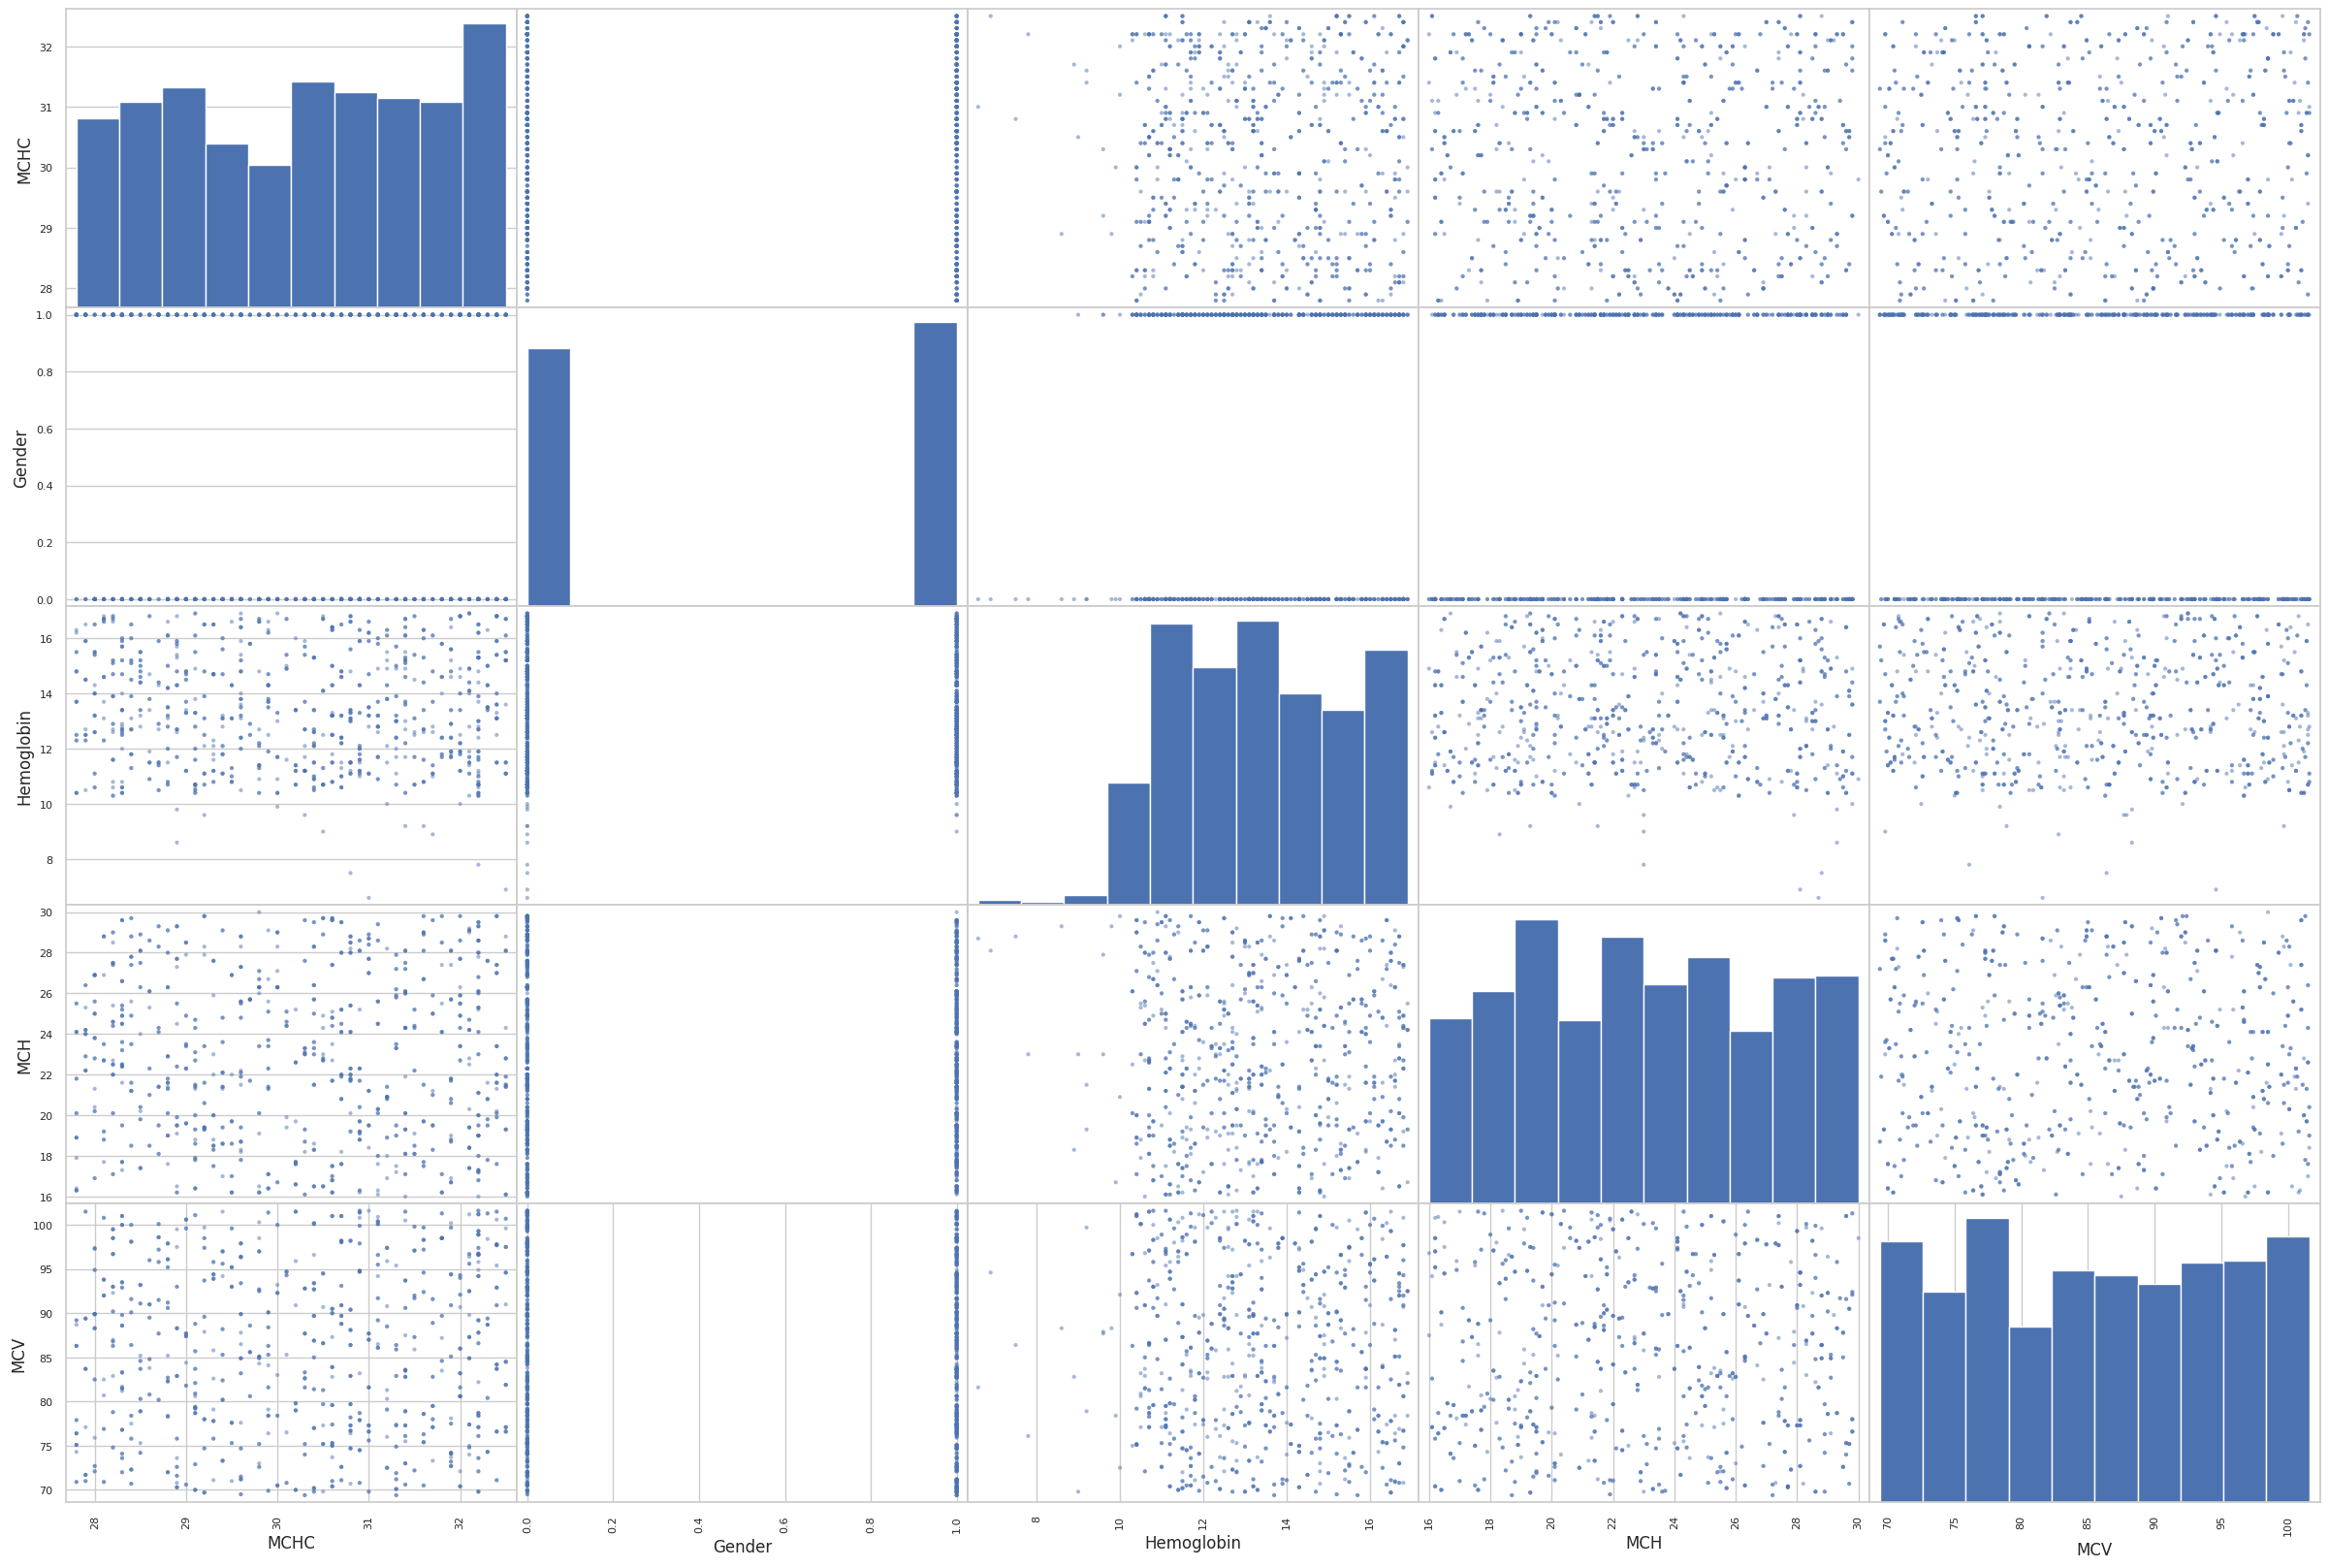

In [ ]:
# Matriz de scatterplots
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(30, 20))

## 3. Pre-selección de variables

In [ ]:
# Dando formato a nuestra tabla resumen

pdResume = X_train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)

In [ ]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/X_train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)

In [ ]:
# Calculando las correlaciones de todas las variables con el target

temp = X_train.copy()
temp['target'] = y_train

correlations = []
for col in features:
  correlations.append(temp[[col, 'target']].corr().iloc[0][1])

In [ ]:
# Cruzando correlaciones con la tabla de resumen original

pdres_cor = pd.DataFrame({'feature' : features, 'corr_MEDV' : correlations})
pdResume2 = pd.merge(pdResume, pdres_cor, on = 'feature')

In [ ]:
pdResume2['abs_corr_MEDV'] = pdResume2.corr_MEDV.apply(lambda x: abs(x))
pdResume2.sort_values(by = 'abs_corr_MEDV', ascending = False, inplace=True)

pdResume2.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV
2,Hemoglobin,994.0,13.422133,2.001639,6.6,11.7,13.30,15.10,16.9,0.0,-0.800193,0.800193
1,Gender,994.0,0.524145,0.499668,0.0,0.0,1.00,1.00,1.0,0.0,0.255803,0.255803
0,MCHC,994.0,30.270121,1.409471,27.8,29.0,30.40,31.50,32.5,0.0,0.041886,0.041886
4,MCV,994.0,85.648994,9.583719,69.4,77.3,85.85,94.15,101.6,0.0,-0.020284,0.020284
3,MCH,994.0,22.976761,3.966175,16.0,19.5,22.80,26.30,30.0,0.0,-0.005776,0.005776


In [ ]:
# Guardando resultados
pdResume2.to_csv('univariate_assesment.csv', index = 0)

## 4. Preparación de datos

In [ ]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv')
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV
0,Hemoglobin,994.0,13.422133,2.001639,6.6,11.7,13.30,15.10,16.9,0.0,-0.800193,0.800193
1,Gender,994.0,0.524145,0.499668,0.0,0.0,1.00,1.00,1.0,0.0,0.255803,0.255803
2,MCHC,994.0,30.270121,1.409471,27.8,29.0,30.40,31.50,32.5,0.0,0.041886,0.041886
3,MCV,994.0,85.648994,9.583719,69.4,77.3,85.85,94.15,101.6,0.0,-0.020284,0.020284
4,MCH,994.0,22.976761,3.966175,16.0,19.5,22.80,26.30,30.0,0.0,-0.005776,0.005776


In [ ]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV,ric,min_ric,max_ric
0,Hemoglobin,994.0,13.422133,2.001639,6.6,11.7,13.30,15.10,16.9,0.0,-0.800193,0.800193,3.40,6.600,20.200
1,Gender,994.0,0.524145,0.499668,0.0,0.0,1.00,1.00,1.0,0.0,0.255803,0.255803,1.00,-1.500,2.500
2,MCHC,994.0,30.270121,1.409471,27.8,29.0,30.40,31.50,32.5,0.0,0.041886,0.041886,2.50,25.250,35.250
3,MCV,994.0,85.648994,9.583719,69.4,77.3,85.85,94.15,101.6,0.0,-0.020284,0.020284,16.85,52.025,119.425
4,MCH,994.0,22.976761,3.966175,16.0,19.5,22.80,26.30,30.0,0.0,-0.005776,0.005776,6.80,9.300,36.500


In [ ]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tric'] = X_train[col].apply(lambda x: desc.max_ric.values[0] if x > desc.max_ric.values[0]
                                                   else desc.min_ric.values[0] if x < desc.min_ric.values[0]
                                                   else x)

X_train.head()

,MCHC,Gender,Hemoglobin,MCH,MCV,Hemoglobin_tric,Gender_tric,MCHC_tric,MCV_tric,MCH_tric
31,29.9,1,14.3,16.4,90.1,14.3,1,29.9,90.1,16.4
1036,30.4,0,10.9,26.4,89.7,10.9,0,30.4,89.7,26.4
503,29.9,1,14.7,23.4,85.3,14.7,1,29.9,85.3,23.4
192,30.6,1,15.0,21.7,90.0,15.0,1,30.6,90.0,21.7
541,32.5,1,11.5,21.4,76.6,11.5,1,32.5,76.6,21.4


Revisemos los resultados

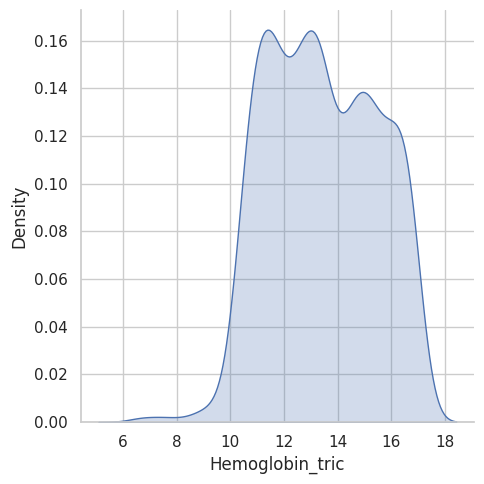

In [ ]:
sns.displot(X_train, x = "Hemoglobin_tric", kind="kde", fill=True)

In [ ]:
# Calculando los intervalos Z-score

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr_MEDV,abs_corr_MEDV,ric,min_ric,max_ric,min_zscore,max_zscore
0,Hemoglobin,994.0,13.422133,2.001639,6.6,11.7,13.30,15.10,16.9,0.0,-0.800193,0.800193,3.40,6.600,20.200,7.417216,19.427050
1,Gender,994.0,0.524145,0.499668,0.0,0.0,1.00,1.00,1.0,0.0,0.255803,0.255803,1.00,-1.500,2.500,-0.974859,2.023149
2,MCHC,994.0,30.270121,1.409471,27.8,29.0,30.40,31.50,32.5,0.0,0.041886,0.041886,2.50,25.250,35.250,26.041707,34.498534
3,MCV,994.0,85.648994,9.583719,69.4,77.3,85.85,94.15,101.6,0.0,-0.020284,0.020284,16.85,52.025,119.425,56.897836,114.400152
4,MCH,994.0,22.976761,3.966175,16.0,19.5,22.80,26.30,30.0,0.0,-0.005776,0.005776,6.80,9.300,36.500,11.078234,34.875287


In [ ]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  X_train[col + '_tzscore'] = X_train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

X_train.head()

,MCHC,Gender,Hemoglobin,MCH,MCV,Hemoglobin_tric,Gender_tric,MCHC_tric,MCV_tric,MCH_tric,Hemoglobin_tzscore,Gender_tzscore,MCHC_tzscore,MCV_tzscore,MCH_tzscore
31,29.9,1,14.3,16.4,90.1,14.3,1,29.9,90.1,16.4,14.3,1,29.9,90.1,16.4
1036,30.4,0,10.9,26.4,89.7,10.9,0,30.4,89.7,26.4,10.9,0,30.4,89.7,26.4
503,29.9,1,14.7,23.4,85.3,14.7,1,29.9,85.3,23.4,14.7,1,29.9,85.3,23.4
192,30.6,1,15.0,21.7,90.0,15.0,1,30.6,90.0,21.7,15.0,1,30.6,90.0,21.7
541,32.5,1,11.5,21.4,76.6,11.5,1,32.5,76.6,21.4,11.5,1,32.5,76.6,21.4


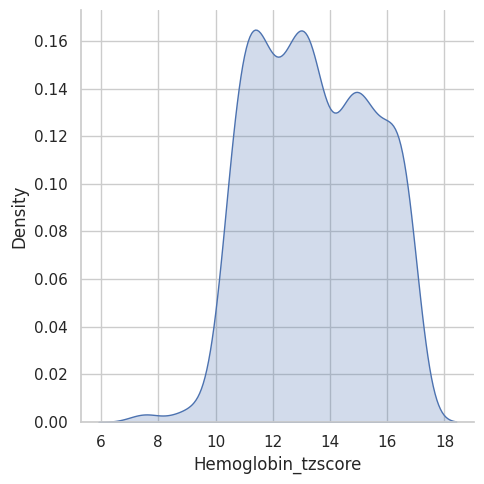

In [ ]:
sns.displot(X_train, x = "Hemoglobin_tzscore", kind="kde", fill=True)